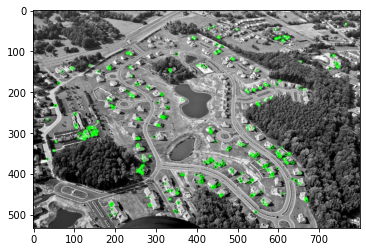

(<matplotlib.image.AxesImage at 0x29a9982c1c0>, None)

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
imga = cv.imread('aerial.jpg',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(imga,None)
# compute the descriptors with ORB
kp, des = orb.compute(imga, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(imga, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

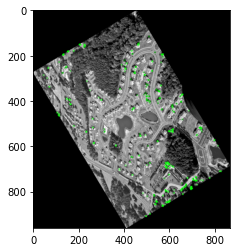

(<matplotlib.image.AxesImage at 0x29a9985f460>, None)

In [9]:
imgb = cv.imread('aerialRot.jpg',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(imgb,None)
# compute the descriptors with ORB
kp, des = orb.compute(imgb, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(imgb, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [10]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(imga,None)
kp2, des2 = orb.detectAndCompute(imgb,None)

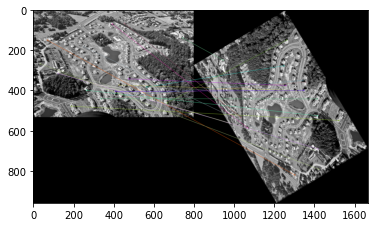

In [23]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(imga,kp1,imgb,kp2,matches[:20],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()


## extract the matched keypoints
src_pts  = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts  = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)
